# 1. Fully Convolutional autoencoder (Enc+Dec, 1-Split, 16-dim) on Reco

In [5]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255.
y_test = keras.utils.to_categorical(y_test)

In [6]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation, MaxPooling2D, UpSampling2D
from keras.utils import plot_model
import random
random.seed(1)

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x = Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid', name='conv1')(enc_input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid', name='conv2')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), activation='relu', padding='valid', name='pt_conv1')(x)
x = Flatten(name='flatten')(x)
# latent = Activation('sigmoid', name='latent')(x)
latent = Activation('linear', name='latent')(x)

# decoder
dec_input = Input(shape=(16,), name='dec_input')
x = Reshape(target_shape=(4,4,1), name='reshape')(dec_input)
x = Conv2DTranspose(filters=1, kernel_size=(2,2), strides=(1,1), activation='relu', padding='valid')(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid')(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid')(x)
dec_output = Conv2D(filters=1, kernel_size=1, padding='same')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))

model.compile(loss='mse', optimizer='adam')
print(encoder.summary())
print(decoder.summary())

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_input (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
pt_conv1 (Conv2D)            (None, 4, 4, 1)           257       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0   

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = keras.models.load_model('../models/51_1split_2.h5')
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
# mc = ModelCheckpoint('../models/51_1split_2.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=200, batch_size=32, callbacks=[mc])
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('No-Split training')
# plt.ylabel('MSE loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.grid(b=True, which='major', color='#666666', linestyle='-')
# plt.savefig('../img/51_PLOTS/FullyConv1split_loss_3.png', dpi=200)

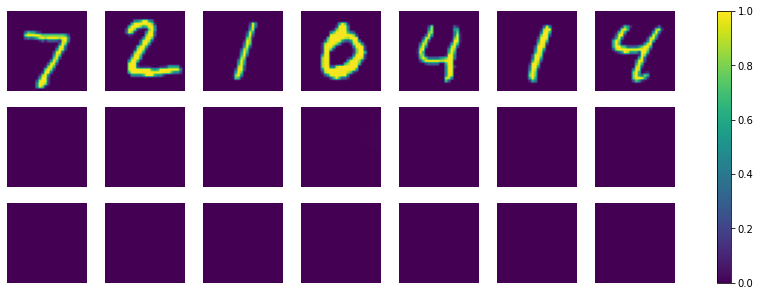

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf

n = 7
plt.figure(figsize=(15, 5))
axs = []
for i in range(n):
    
    # predict
    x = x_test[i]
    z = encoder(x.reshape(1,28,28,1))
    y = decoder(z)
    
    axs.append(plt.subplot(3, n, i+1))
    plt.axis('off')
    plt.imshow(x.reshape(28,28), vmin=0, vmax=1)
    
    axs.append(plt.subplot(3, n, n+i+1))
    plt.axis('off')
    plt.imshow(tf.reshape(z, (4,4)), vmin=0, vmax=1)
    
    axs.append(plt.subplot(3, n, 2*n+i+1))
    plt.axis('off')
    plt.imshow(tf.reshape(y, (28,28)), vmin=0, vmax=1)
plt.colorbar(ax=axs)

# 2. Architecture from above with Dense added at end of encoder and start of decoder.

In [4]:
from keras.models import Model
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, Input, Reshape, concatenate, Activation, MaxPooling2D, UpSampling2D
from keras.utils import plot_model
import random
random.seed(1)

# encoder
enc_input = Input(shape=(28,28,1), name='enc_input')
x = Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid', name='conv1')(enc_input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid', name='conv2')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), activation='relu', padding='valid', name='pt_conv1')(x)
x = Flatten(name='flatten')(x)
# latent = Dense(activation='sigmoid', units=16)(x)
latent = Dense(activation='linear', units=16)(x)
# latent = Activation('sigmoid', name='latent')(x)

# decoder
dec_input = Input(shape=(16,), name='dec_input')
x = Dense(units=16)(dec_input)
x = Reshape(target_shape=(4,4,1), name='reshape')(x)
x = Conv2DTranspose(filters=1, kernel_size=(2,2), strides=(1,1), activation='relu', padding='valid')(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid')(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid')(x)
dec_output = Conv2D(filters=1, kernel_size=1, padding='same')(x)

encoder = Model(enc_input, latent, name="Encoder")
decoder = Model(dec_input, dec_output, name="Decoder")
model = Model(encoder.input, decoder(encoder.output))

model.compile(loss='mse', optimizer='adam')
print(encoder.summary())
print(decoder.summary())

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_input (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
pt_conv1 (Conv2D)            (None, 4, 4, 1)           257       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0   

Epoch 1/1000
1874/1875 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00001: val_loss improved from inf to 0.01688, saving model to ../models/51_1split_dense.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0169 - val_loss: 0.0169
Epoch 2/1000
1873/1875 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00002: val_loss improved from 0.01688 to 0.01682, saving model to ../models/51_1split_dense.h5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 3/1000
1871/1875 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00003: val_loss did not improve from 0.01682
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0169 - val_loss: 0.0170
Epoch 4/1000
1870/1875 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00004: val_loss did not improve from 0.01682
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 5/

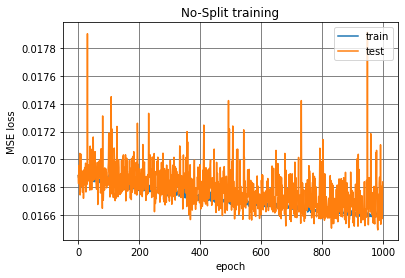

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model = keras.models.load_model('../models/51_1split_dense.h5')
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('../models/51_1split_dense.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

history = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=1000, batch_size=32, callbacks=[mc])
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('No-Split training')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('../img/51_PLOTS/DenseConv1split_loss_2k_epochs.png', dpi=200)

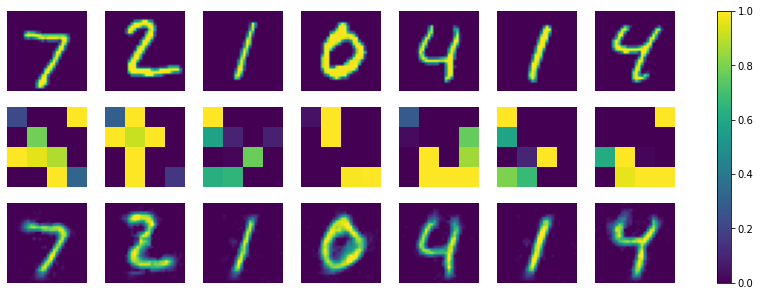

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

n = 7
plt.figure(figsize=(15, 5))
axs = []
for i in range(n):
    
    # predict
    x = x_test[i]
    z = encoder(x.reshape(1,28,28,1))
    y = decoder(z)
    
    axs.append(plt.subplot(3, n, i+1))
    plt.axis('off')
    plt.imshow(x.reshape(28,28), vmin=0, vmax=1)
    
    axs.append(plt.subplot(3, n, n+i+1))
    plt.axis('off')
    plt.imshow(tf.reshape(z, (4,4)), vmin=0, vmax=1)
    
    axs.append(plt.subplot(3, n, 2*n+i+1))
    plt.axis('off')
    plt.imshow(tf.reshape(y, (28,28)), vmin=0, vmax=1)
plt.colorbar(ax=axs)